In [38]:
# linear_model for linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# use scikit learn to generate 30 dummy data for house prediction
from sklearn.datasets import make_regression

In [3]:
np.random.seed(0)

In [34]:
# Generate data
np.random.seed(0)
area = np.random.randint(500, 3000, 30)  # Random area values between 500 and 3000
price = area * 150 + np.random.randn(30) * 10000  # Price is proportional to area with some noise


In [35]:
# Create a DataFrame with columns 'Area' and 'Price'
df = pd.DataFrame({'Area': area, 'Price': price})

In [36]:
df.head()

,Area,Price
0,2153,297420.101842
1,1335,206786.185954
2,1263,198094.361989
3,2231,327228.349796
4,1533,252647.546240


,Area,Price
0,2153,324637
1,1335,195964
2,1263,186742
3,2231,337993
4,1533,226157


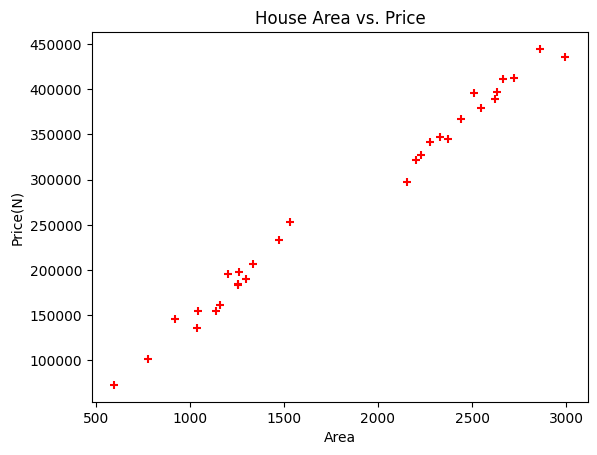

In [37]:
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price(N)')
plt.title("House Area vs. Price")
plt.scatter(df.Area, df.Price, color='red', marker='+')


In [39]:
model = LinearRegression()

In [41]:
# train the linear regression model
model.fit(df[['Area']], df.Price)

LinearRegression()

In [52]:
new_data = pd.DataFrame({'Area': [800]})

In [53]:
predicted_price = model.predict(new_data)

In [54]:
print(predicted_price)

[115358.33081428]


## How did our model predicted the new Area's price?
the model is able to predict new prices using the coefficients and intercept it learned during the training phase. Here's a simplified explanation of how it works:

1. **Training Phase**: When you train a linear regression model, it learns the relationship between the input features (in this case, the 'Area' of houses) and the target variable (the 'Price' of houses). It does this by finding the best-fitting line that minimizes the error between its predictions and the actual prices in the training data. This line is defined by two parameters:
   - **Coefficient (Slope)**: This represents how much the predicted price changes for a unit change in the 'Area'. In other words, it quantifies the impact of the 'Area' on the price.
   - **Intercept (Bias)**: This is the predicted price when the 'Area' is zero. It accounts for the baseline price that a house might have even if its 'Area' is zero (which doesn't make sense for houses, but it's a necessary component of the linear equation).

2. **Prediction Phase**: When you want to make predictions on new data (e.g., a house with an 'Area' of 100), the model uses the learned coefficients and intercept to calculate the predicted price. It does this by simply plugging the new 'Area' value into the linear equation it learned during training:
   - Predicted Price = (Coefficient * Area) + Intercept

The model uses the coefficient to scale the 'Area' value and then adds the intercept to get the predicted price. So, in this case, it's using the coefficients and intercept to make predictions for new prices.

The model's ability to generalize from the training data to make predictions on new, unseen data is the essence of its predictive power. It assumes that the relationship it learned during training between 'Area' and 'Price' holds true for new houses as well, which is why it can provide predictions for them.

now lets prove that y = mx + b
- y: the price you want 
- m: the slope aka coefficient
- x: the predictor variable (Area)
- b: intercept ( value of y when x = 0)

In [60]:
m = model.coef_

In [61]:
b = model.intercept_

In [62]:
x = 800

In [63]:
y = m * x + b
print(y)

[115358.33081428]


In [68]:
# predict prices for multiple house area
data = pd.read_csv('area.csv')
data.head()

,Area
0,300
1,800
2,1200
3,4200
4,500


In [70]:
predicted_prices = model.predict(data)

In [73]:
data['Prices'] = predicted_prices

In [77]:
data.drop('prices', axis=1, inplace=True)
data.head()

,Area,Prices
0,300,38807.930614
1,800,115358.330814
2,1200,176598.650974
3,4200,635901.052174
4,500,69428.090694


In [78]:
data.to_csv('predictions.csv', index=False)

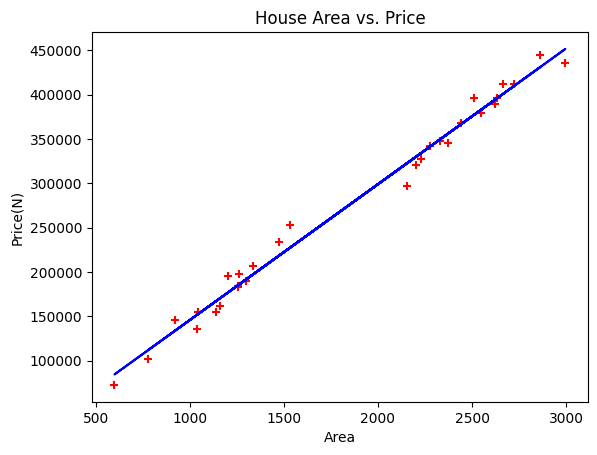

In [85]:
# show how our model is predicting in the plot
%matplotlib inline
plt.xlabel('Area')
plt.ylabel('Price(N)')
plt.title("House Area vs. Price")
plt.scatter(df.Area, df.Price, color='red', marker='+')
plt.plot(df.Area, model.predict(df[['Area']]), color='blue')